# Saeb 2021 - 9º ano Ensino Fundamental:

Os microdados do Saeb podem ser encontrados aqui: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/saeb ou https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/saeb/resultados

**Análises:**
1) Distribuição de estudantes do 9º ano EF por declaração de cor/ raça e por proficiência em Língua Portuguesa, Matemática, Ciências Humanas e Ciências da Natureza.

In [51]:
# Importando as bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Distribuição de estudantes do 9º ano EF por declaração de cor/ raça e por proficiência em Língua Portuguesa, Matemática, Ciências Humanas e Ciências da Natureza:

## 9º ano do Ensino Fundamental:

Segundo o dicionário dos dados, a variável 'TX_RESP_Q04' (Qual é sua cor ou raça?) pode apresentar 8 valores distintos:
- *: Nulo;
- .: Resposta em branco;
- A: Branca;
- B: Preta;
- C: Parda;
- D: Amarela;
- E: Indígena;
- F: Não quero declarar.

Vamos utilizar dados do Saeb de 2021.

In [52]:
# Carregar os dados do Saeb 2021 em csv:
saeb2021_9EF = pd.read_csv(r"C:\Users\hugob\OneDrive\Desktop\microdados_saeb_2021_ensino_fundamental_e_medio\DADOS\TS_ALUNO_9EF.csv", sep=';')

MemoryError: Unable to allocate 32.0 KiB for an array with shape (4096,) and data type int64

In [ ]:
saeb2021_9EF

In [ ]:
# Contagem de participantes em cada categoria:
contagem = saeb2021_9EF['TX_RESP_Q04'].value_counts()

contagem

As proficiências são calculadas de acordo com a escala Saeb. 
Uma considera a média como 0 e desvio padrão 1. A outra considera a média 250 e desvio padrão 50. Sendo assim, caso a média das categorias estejam abaixo de 0 ou de 250, isso significa que elas estão abaixo do que seria a média da escala Saeb.

Para mais informações sobre a escala de proficiência Saeb, acesse: https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/saeb/matrizes-e-escalas

In [ ]:
# Calcula a média, agrupando por Raça/Cor:
LP_media = saeb2021_9EF.groupby('TX_RESP_Q04')['PROFICIENCIA_LP'].mean()
LP_saeb_media = saeb2021_9EF.groupby('TX_RESP_Q04')['PROFICIENCIA_LP_SAEB'].mean()
MT_media = saeb2021_9EF.groupby('TX_RESP_Q04')['PROFICIENCIA_MT'].mean()
MT_saeb_media = saeb2021_9EF.groupby('TX_RESP_Q04')['PROFICIENCIA_MT_SAEB'].mean()
CH_media = saeb2021_9EF.groupby('TX_RESP_Q04')['PROFICIENCIA_CH'].mean()
CH_saeb_media = saeb2021_9EF.groupby('TX_RESP_Q04')['PROFICIENCIA_CH_SAEB'].mean()
CN_media = saeb2021_9EF.groupby('TX_RESP_Q04')['PROFICIENCIA_CN'].mean()
CN_saeb_media = saeb2021_9EF.groupby('TX_RESP_Q04')['PROFICIENCIA_CN_SAEB'].mean()

In [ ]:
# Concatenar as Series em um único DataFrame:
saeb2021_9EF_proficiencia = pd.concat([contagem, LP_media, LP_saeb_media, MT_media, MT_saeb_media, CH_media, CH_saeb_media, CN_media, CN_saeb_media], axis=1)

# Remover a coluna do índice:
saeb2021_9EF_proficiencia = saeb2021_9EF_proficiencia.reset_index()

In [ ]:
# Renomear a coluna:
saeb2021_9EF_proficiencia.columns = ['COR ou RACA', 'Contagem', 'PROFICIENCIA_LP', 'PROFICIENCIA_LP_SAEB', 'PROFICIENCIA_MT', 'PROFICIENCIA_MT_SAEB', 'PROFICIENCIA_CH', 'PROFICIENCIA_CH_SAEB', 'PROFICIENCIA_CN', 'PROFICIENCIA_CN_SAEB']

# Substituir os valores de 'COR ou RACA':
# Dicionário de mapeamento de valores a serem substituídos:
substituicoes_cor_raca = {'*': 'Nulo',
                          '.': 'Resposta em branco',
                          'A': 'Branca',
                          'B': 'Preta',
                          'C': 'Parda',
                          'D': 'Amarela',
                          'E': 'Indígena',
                          'F': 'Não quero declarar'}

# Substituir os valores na coluna específica usando o dicionário:
saeb2021_9EF_proficiencia['COR ou RACA'] = saeb2021_9EF_proficiencia['COR ou RACA'].replace(substituicoes_cor_raca)

In [ ]:
# Reduzir para 2 casas decimais:
saeb2021_9EF_proficiencia = saeb2021_9EF_proficiencia.round(2)

In [ ]:
saeb2021_9EF_proficiencia

#### Visualizações:

In [ ]:
# Selecionar as variáveis específicas do DataFrame:
colunas_selecionadas = ['PROFICIENCIA_LP_SAEB', 'PROFICIENCIA_MT_SAEB', 'PROFICIENCIA_CH_SAEB', 'PROFICIENCIA_CN_SAEB']

# Criar o gráfico de barras verticais
saeb2021_9EF_proficiencia.set_index('COR ou RACA')[colunas_selecionadas].plot(kind='bar', colormap='cividis', stacked=False, figsize=(10, 6))

# Adicionar rótulos aos eixos
plt.xlabel('Cor/ Raça')
plt.ylabel('Proficiência')
plt.title('Saeb 2021: Proficiência dos estudantes do 9º ano')

# Mover a legenda para fora do gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Salvar imagem:
plt.savefig('Saeb 2021_Proficiencia 9EF.png')

# Exibir o gráfico
plt.show()

In [ ]:
# BOXPLOT:
# Crie a figura e os eixos para os subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

# Boxplot para PROFICIENCIA_LP_SAEB
sns.boxplot(x='TX_RESP_Q04', y='PROFICIENCIA_LP_SAEB', data=saeb2021_9EF, ax=axes[0, 0], palette="Purples")
axes[0, 0].set_title('Boxplot de Proficiência em Língua Portuguesa (Saeb 2021)')
axes[0, 0].set_xlabel('Cor ou Raça')
axes[0, 0].set_ylabel('Proficiência - Língua Portuguesa')

# Modificar rótulos manualmente
axes[0, 0].set_xticklabels(['Não quero declarar', 'Resposta em branco', 'Parda', 'Branca', 'Nulo', 'Preta', 'Indígena', 'Amarela'], rotation=45, ha='right')

# Boxplot para PROFICIENCIA_MT_SAEB
sns.boxplot(x='TX_RESP_Q04', y='PROFICIENCIA_MT_SAEB', data=saeb2021_9EF, ax=axes[0, 1], palette="Blues")
axes[0, 1].set_title('Boxplot de Proficiência em Matemática (Saeb 2021)')
axes[0, 1].set_xlabel('Cor ou Raça')
axes[0, 1].set_ylabel('Proficiência - Matemática')

# Modificar rótulos manualmente
axes[0, 1].set_xticklabels(['Não quero declarar', 'Resposta em branco', 'Parda', 'Branca', 'Nulo', 'Preta', 'Indígena', 'Amarela'], rotation=45, ha='right')

# Boxplot para PROFICIENCIA_CH_SAEB
sns.boxplot(x='TX_RESP_Q04', y='PROFICIENCIA_CH_SAEB', data=saeb2021_9EF, ax=axes[1, 0], palette="Purples")
axes[1, 0].set_title('Boxplot de Proficiência em Ciências Humanas (Saeb 2021)')
axes[1, 0].set_xlabel('Cor ou Raça')
axes[1, 0].set_ylabel('Proficiência - Ciências Humanas')

# Modificar rótulos manualmente
axes[1, 0].set_xticklabels(['Não quero declarar', 'Resposta em branco', 'Parda', 'Branca', 'Nulo', 'Preta', 'Indígena', 'Amarela'], rotation=45, ha='right')

# Boxplot para PROFICIENCIA_CN_SAEB
sns.boxplot(x='TX_RESP_Q04', y='PROFICIENCIA_CN_SAEB', data=saeb2021_9EF, ax=axes[1, 1], palette="Blues")
axes[1, 1].set_title('Boxplot de Proficiência em Ciências da Natureza (Saeb 2021)')
axes[1, 1].set_xlabel('Cor ou Raça')
axes[1, 1].set_ylabel('Proficiência - Ciências da Natureza')

# Modificar rótulos manualmente
axes[1, 1].set_xticklabels(['Não quero declarar', 'Resposta em branco', 'Parda', 'Branca', 'Nulo', 'Preta', 'Indígena', 'Amarela'], rotation=45, ha='right')

# Ajuste de layout para evitar sobreposição de rótulos
plt.tight_layout()

# Salvar imagem:
plt.savefig('Saeb 2021_Boxplot_Proficiencia 9EF.png')

# Exibe o gráfico
plt.show()

In [ ]:
# GRÁFICO DE VIOLINO:
# Crie a figura e os eixos para os subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Boxplot para PROFICIENCIA_LP_SAEB
sns.violinplot(x='TX_RESP_Q04', y='PROFICIENCIA_LP_SAEB', data=saeb2021_9EF, ax=axes[0, 0], palette="Purples")
axes[0, 0].set_title('Violinplot de Proficiência em Língua Portuguesa (Saeb 2021)')
axes[0, 0].set_xlabel('Cor ou Raça')
axes[0, 0].set_ylabel('Proficiência - Língua Portuguesa')

# Modificar rótulos manualmente
axes[0, 0].set_xticklabels(['Não quero declarar', 'Resposta em branco', 'Parda', 'Branca', 'Nulo', 'Preta', 'Indígena', 'Amarela'], rotation=45, ha='right')

# Boxplot para PROFICIENCIA_MT_SAEB
sns.violinplot(x='TX_RESP_Q04', y='PROFICIENCIA_MT_SAEB', data=saeb2021_9EF, ax=axes[0, 1], palette="Blues")
axes[0, 1].set_title('Violinplot de Proficiência em Matemática (Saeb 2021)')
axes[0, 1].set_xlabel('Cor ou Raça')
axes[0, 1].set_ylabel('Proficiência - Matemática')

# Modificar rótulos manualmente
axes[0, 1].set_xticklabels(['Não quero declarar', 'Resposta em branco', 'Parda', 'Branca', 'Nulo', 'Preta', 'Indígena', 'Amarela'], rotation=45, ha='right')

# Boxplot para PROFICIENCIA_CH_SAEB
sns.violinplot(x='TX_RESP_Q04', y='PROFICIENCIA_CH_SAEB', data=saeb2021_9EF, ax=axes[1, 0], palette="Purples")
axes[1, 0].set_title('Violinplot de Proficiência em Ciências Humanas (Saeb 2021)')
axes[1, 0].set_xlabel('Cor ou Raça')
axes[1, 0].set_ylabel('Proficiência - Ciências Humanas')

# Modificar rótulos manualmente
axes[1, 0].set_xticklabels(['Não quero declarar', 'Resposta em branco', 'Parda', 'Branca', 'Nulo', 'Preta', 'Indígena', 'Amarela'], rotation=45, ha='right')

# Boxplot para PROFICIENCIA_CN_SAEB
sns.violinplot(x='TX_RESP_Q04', y='PROFICIENCIA_CN_SAEB', data=saeb2021_9EF, ax=axes[1, 1], palette="Blues")
axes[1, 1].set_title('Violinplot de Proficiência em Ciências da Natureza (Saeb 2021)')
axes[1, 1].set_xlabel('Cor ou Raça')
axes[1, 1].set_ylabel('Proficiência - Ciências da Natureza')

# Modificar rótulos manualmente
axes[1, 1].set_xticklabels(['Não quero declarar', 'Resposta em branco', 'Parda', 'Branca', 'Nulo', 'Preta', 'Indígena', 'Amarela'], rotation=45, ha='right')

# Ajuste de layout para evitar sobreposição de rótulos
plt.tight_layout()

# Salvar imagem:
plt.savefig('Saeb 2021_Violinplot_Proficiencia 9EF.png')

# Exibe o gráfico
plt.show()

## Para além da proficiência, vamos contabilizar alguns outros indicadores:

- TX_RESP_Q07: Qual é a maior escolaridade da sua mãe (ou mulher responsável por você)?
- TX_RESP_Q08: Qual é a maior escolaridade de seu pai (ou homem responsável por você)?
- TX_RESP_Q09c: Com que frequência seus pais ou responsáveis costumam: - Incentivar você a estudar.

### TX_RESP_Q07: Qual é a maior escolaridade da sua mãe (ou mulher responsável por você)?

In [53]:
saeb2021_9EF_escolaridade_mae = pd.crosstab(saeb2021_9EF['TX_RESP_Q04'], saeb2021_9EF['TX_RESP_Q07'])

saeb2021_9EF_escolaridade_mae

TX_RESP_Q07,*,.,A,B,C,D,E,F
TX_RESP_Q04,,,,,,,,
*,229,53,259,292,438,820,463,1175
.,132,737876,867,1004,1366,2983,1371,4957
A,4349,3840,34045,45356,70010,172944,96006,157744
B,1862,2254,18956,22217,30905,61530,24012,76550
C,5292,5820,61212,77653,107369,225528,91666,254300
D,320,386,3613,4218,5703,11336,5113,13746
E,196,269,2412,2825,3740,6565,2912,8422
F,673,1059,7429,7605,10040,20529,9653,57468


In [54]:
# Modificando os nomes das colunas:
saeb2021_9EF_escolaridade_mae = saeb2021_9EF_escolaridade_mae.rename_axis(columns='Escolaridade da mãe').rename_axis(index='Cor ou Raça')

In [55]:
# Renomear as colunas:
saeb2021_9EF_escolaridade_mae.columns = ['Nulo',
                                         'Resposta em branco',
                                         'Não completou o 5º ano do Ensino Fundamental',
                                         'Ensino Fundamental, até o 5º ano',
                                         'Ensino Fundamental completo',
                                         'Ensino Médio completo',
                                         'Ensino Superior completo (faculdade ou graduação)',
                                         'Não sei']

In [56]:
# Renomear os índices:
saeb2021_9EF_escolaridade_mae = saeb2021_9EF_escolaridade_mae.rename({'*': 'Nulo',
                                                                      '.': 'Resposta em branco',
                                                                      'A': 'Branca',
                                                                      'B': 'Preta',
                                                                      'C': 'Parda',
                                                                      'D': 'Amarela',
                                                                      'E': 'Indígena',
                                                                      'F': 'Não quero declarar'})

In [57]:
saeb2021_9EF_escolaridade_mae

,Nulo,Resposta em branco,Não completou o 5º ano do Ensino Fundamental,"Ensino Fundamental, até o 5º ano",Ensino Fundamental completo,Ensino Médio completo,Ensino Superior completo (faculdade ou graduação),Não sei
Cor ou Raça,,,,,,,,
Nulo,229,53,259,292,438,820,463,1175
Resposta em branco,132,737876,867,1004,1366,2983,1371,4957
Branca,4349,3840,34045,45356,70010,172944,96006,157744
Preta,1862,2254,18956,22217,30905,61530,24012,76550
Parda,5292,5820,61212,77653,107369,225528,91666,254300
Amarela,320,386,3613,4218,5703,11336,5113,13746
Indígena,196,269,2412,2825,3740,6565,2912,8422
Não quero declarar,673,1059,7429,7605,10040,20529,9653,57468


In [58]:
# Calcule as porcentagens em relação ao somatório das linhas:
saeb2021_9EF_escolaridade_mae_porcentagem = saeb2021_9EF_escolaridade_mae.div(saeb2021_9EF_escolaridade_mae.sum(axis=1), axis=0) * 100

# Adicione as novas colunas ao DataFrame original:
saeb2021_9EF_escolaridade_mae = pd.concat([saeb2021_9EF_escolaridade_mae, saeb2021_9EF_escolaridade_mae_porcentagem.add_suffix(' (%)')], axis=1)

In [59]:
saeb2021_9EF_escolaridade_mae = saeb2021_9EF_escolaridade_mae.round(2)

In [60]:
saeb2021_9EF_escolaridade_mae

,Nulo,Resposta em branco,Não completou o 5º ano do Ensino Fundamental,"Ensino Fundamental, até o 5º ano",Ensino Fundamental completo,Ensino Médio completo,Ensino Superior completo (faculdade ou graduação),Não sei,Nulo (%),Resposta em branco (%),Não completou o 5º ano do Ensino Fundamental (%),"Ensino Fundamental, até o 5º ano (%)",Ensino Fundamental completo (%),Ensino Médio completo (%),Ensino Superior completo (faculdade ou graduação) (%),Não sei (%)
Cor ou Raça,,,,,,,,,,,,,,,,
Nulo,229,53,259,292,438,820,463,1175,6.14,1.42,6.95,7.83,11.75,21.99,12.42,31.51
Resposta em branco,132,737876,867,1004,1366,2983,1371,4957,0.02,98.31,0.12,0.13,0.18,0.40,0.18,0.66
Branca,4349,3840,34045,45356,70010,172944,96006,157744,0.74,0.66,5.83,7.76,11.98,29.60,16.43,27.00
Preta,1862,2254,18956,22217,30905,61530,24012,76550,0.78,0.95,7.96,9.32,12.97,25.82,10.08,32.13
Parda,5292,5820,61212,77653,107369,225528,91666,254300,0.64,0.70,7.39,9.37,12.95,27.21,11.06,30.68
Amarela,320,386,3613,4218,5703,11336,5113,13746,0.72,0.87,8.13,9.49,12.83,25.51,11.51,30.94
Indígena,196,269,2412,2825,3740,6565,2912,8422,0.72,0.98,8.82,10.33,13.68,24.01,10.65,30.80
Não quero declarar,673,1059,7429,7605,10040,20529,9653,57468,0.59,0.93,6.49,6.64,8.77,17.94,8.43,50.21


In [61]:
# Exportar o DataFrame para Excel:
saeb2021_9EF_escolaridade_mae.to_excel(r"C:\Users\hugob\Downloads\9EF_escolaridade_mae.xlsx", index=False)

#### Visualizações:

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

#Novo Dataframe só com as colunas de % de escolaridade:
# Selecione as colunas desejadas:
columns_to_plot = ['Nulo (%)',
                   'Resposta em branco (%)',
                   'Não completou o 5º ano do Ensino Fundamental (%)',
                   'Ensino Fundamental, até o 5º ano (%)',
                   'Ensino Fundamental completo (%)',
                   'Ensino Médio completo (%)',
                   'Ensino Superior completo (faculdade ou graduação) (%)',
                   'Não sei (%)']

# Crie um novo DataFrame apenas com as colunas desejadas
saeb2021_9EF_escolaridade_mae_porcentagem = saeb2021_9EF_escolaridade_mae[columns_to_plot]

In [63]:
saeb2021_9EF_escolaridade_mae_porcentagem = saeb2021_9EF_escolaridade_mae_porcentagem.round(2)

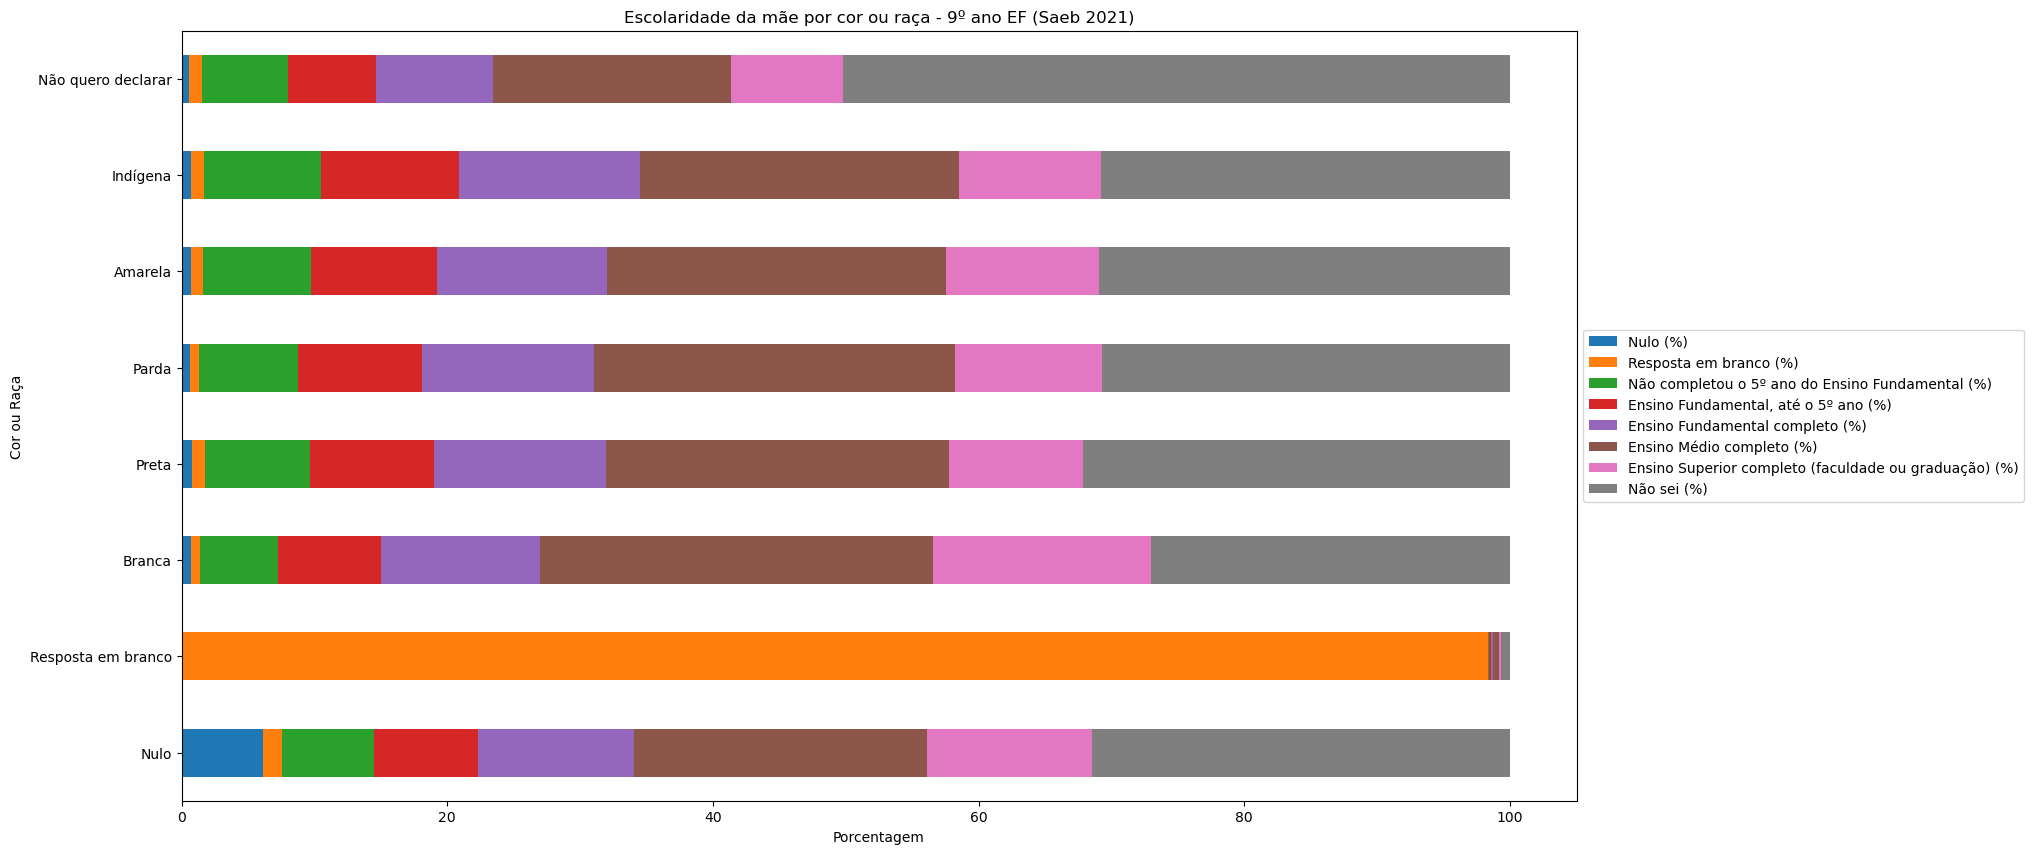

In [64]:
# Criar gráfico de barras empilhadas horizontais
ax = saeb2021_9EF_escolaridade_mae_porcentagem.plot(kind='barh', stacked=True, figsize=(18, 10))

# Configurar rótulos e título
ax.set_xlabel('Porcentagem')
ax.set_ylabel('Cor ou Raça')
ax.set_title('Escolaridade da mãe por cor ou raça - 9º ano EF (Saeb 2021)')

# Adicionar a legenda fora do gráfico
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Salvar imagem:
plt.savefig('9EF_Escolaridade mae.png', bbox_inches='tight')


# Exibir o gráfico
plt.show()

In [65]:
saeb2021_9EF_escolaridade_mae_porcentagem

,Nulo (%),Resposta em branco (%),Não completou o 5º ano do Ensino Fundamental (%),"Ensino Fundamental, até o 5º ano (%)",Ensino Fundamental completo (%),Ensino Médio completo (%),Ensino Superior completo (faculdade ou graduação) (%),Não sei (%)
Cor ou Raça,,,,,,,,
Nulo,6.14,1.42,6.95,7.83,11.75,21.99,12.42,31.51
Resposta em branco,0.02,98.31,0.12,0.13,0.18,0.40,0.18,0.66
Branca,0.74,0.66,5.83,7.76,11.98,29.60,16.43,27.00
Preta,0.78,0.95,7.96,9.32,12.97,25.82,10.08,32.13
Parda,0.64,0.70,7.39,9.37,12.95,27.21,11.06,30.68
Amarela,0.72,0.87,8.13,9.49,12.83,25.51,11.51,30.94
Indígena,0.72,0.98,8.82,10.33,13.68,24.01,10.65,30.80
Não quero declarar,0.59,0.93,6.49,6.64,8.77,17.94,8.43,50.21


### TX_RESP_Q08: Qual é a maior escolaridade de seu pai (ou homem responsável por você)?

In [66]:
saeb2021_9EF_escolaridade_pai = pd.crosstab(saeb2021_9EF['TX_RESP_Q04'], saeb2021_9EF['TX_RESP_Q08'])

saeb2021_9EF_escolaridade_pai

TX_RESP_Q08,*,.,A,B,C,D,E,F
TX_RESP_Q04,,,,,,,,
*,172,54,273,265,388,673,280,1624
.,54,737955,919,990,1121,2106,863,6548
A,2261,3462,41080,50051,61742,135740,63165,226793
B,747,2259,21434,21606,24607,43980,14165,109488
C,2420,5293,74542,78214,86925,161187,56727,363532
D,157,358,4131,4084,4669,7974,3296,19766
E,104,251,2755,2714,3044,4885,2056,11532
F,281,1062,8064,7024,7550,13980,6062,70433


In [67]:
# Renomear as colunas:
saeb2021_9EF_escolaridade_pai.columns = ['Nulo',
                                         'Resposta em branco',
                                         'Não completou o 5º ano do Ensino Fundamental',
                                         'Ensino Fundamental, até o 5º ano',
                                         'Ensino Fundamental completo',
                                         'Ensino Médio completo',
                                         'Ensino Superior completo (faculdade ou graduação)',
                                         'Não sei']

In [68]:
# Modificando os nomes das colunas:
saeb2021_9EF_escolaridade_pai = saeb2021_9EF_escolaridade_pai.rename_axis(index='Cor ou Raça')

In [69]:
# Renomear os índices:
saeb2021_9EF_escolaridade_pai = saeb2021_9EF_escolaridade_pai.rename({'*': 'Nulo',
                                                                      '.': 'Resposta em branco',
                                                                      'A': 'Branca',
                                                                      'B': 'Preta',
                                                                      'C': 'Parda',
                                                                      'D': 'Amarela',
                                                                      'E': 'Indígena',
                                                                      'F': 'Não quero declarar'})

In [70]:
# Calcule as porcentagens em relação ao somatório das linhas:
saeb2021_9EF_escolaridade_pai_porcentagem = saeb2021_9EF_escolaridade_pai.div(saeb2021_9EF_escolaridade_pai.sum(axis=1), axis=0) * 100

# Adicione as novas colunas ao DataFrame original:
saeb2021_9EF_escolaridade_pai = pd.concat([saeb2021_9EF_escolaridade_pai, saeb2021_9EF_escolaridade_pai_porcentagem.add_suffix(' (%)')], axis=1)

In [71]:
saeb2021_9EF_escolaridade_pai = saeb2021_9EF_escolaridade_pai.round(2)

#### Visualizações:

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

#Novo Dataframe só com as colunas de % de escolaridade:
# Selecione as colunas desejadas:
columns_to_plot = ['Nulo (%)',
                   'Resposta em branco (%)',
                   'Não completou o 5º ano do Ensino Fundamental (%)',
                   'Ensino Fundamental, até o 5º ano (%)',
                   'Ensino Fundamental completo (%)',
                   'Ensino Médio completo (%)',
                   'Ensino Superior completo (faculdade ou graduação) (%)',
                   'Não sei (%)']

# Crie um novo DataFrame apenas com as colunas desejadas
saeb2021_9EF_escolaridade_pai_porcentagem = saeb2021_9EF_escolaridade_pai[columns_to_plot]

In [73]:
saeb2021_9EF_escolaridade_pai_porcentagem = saeb2021_9EF_escolaridade_pai_porcentagem.round(2)

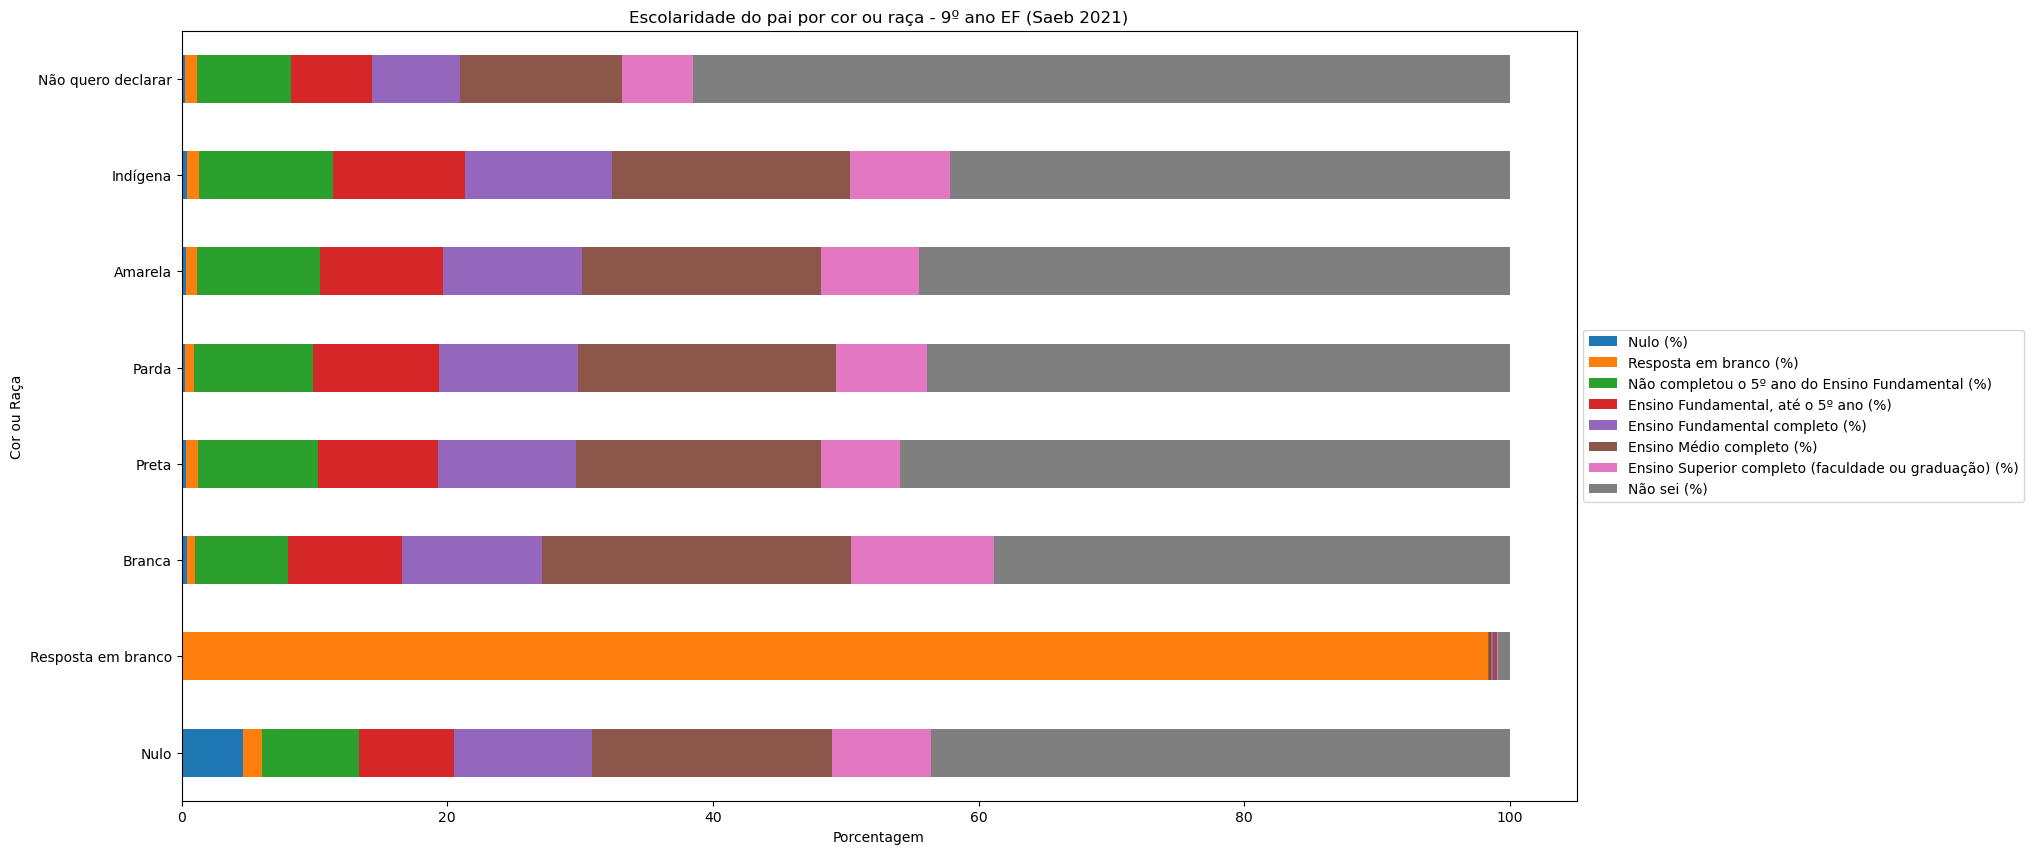

In [74]:
# Criar gráfico de barras empilhadas horizontais
ax = saeb2021_9EF_escolaridade_pai_porcentagem.plot(kind='barh', stacked=True, figsize=(18, 10))

# Configurar rótulos e título
ax.set_xlabel('Porcentagem')
ax.set_ylabel('Cor ou Raça')
ax.set_title('Escolaridade do pai por cor ou raça - 9º ano EF (Saeb 2021)')

# Adicionar a legenda fora do gráfico
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Salvar imagem:
plt.savefig('9EF_Escolaridade pai.png', bbox_inches='tight')


# Exibir o gráfico
plt.show()

In [75]:
saeb2021_9EF_escolaridade_pai_porcentagem

,Nulo (%),Resposta em branco (%),Não completou o 5º ano do Ensino Fundamental (%),"Ensino Fundamental, até o 5º ano (%)",Ensino Fundamental completo (%),Ensino Médio completo (%),Ensino Superior completo (faculdade ou graduação) (%),Não sei (%)
Cor ou Raça,,,,,,,,
Nulo,4.61,1.45,7.32,7.11,10.40,18.05,7.51,43.55
Resposta em branco,0.01,98.32,0.12,0.13,0.15,0.28,0.11,0.87
Branca,0.39,0.59,7.03,8.57,10.57,23.23,10.81,38.81
Preta,0.31,0.95,9.00,9.07,10.33,18.46,5.94,45.95
Parda,0.29,0.64,8.99,9.44,10.49,19.45,6.84,43.86
Amarela,0.35,0.81,9.30,9.19,10.51,17.95,7.42,44.48
Indígena,0.38,0.92,10.08,9.93,11.13,17.87,7.52,42.18
Não quero declarar,0.25,0.93,7.05,6.14,6.60,12.21,5.30,61.54


### TX_RESP_Q09c: Com que frequência seus pais ou responsáveis costumam: - Incentivar você a estudar.

In [76]:
saeb2021_9EF_incentivo_estudo = pd.crosstab(saeb2021_9EF['TX_RESP_Q04'], saeb2021_9EF['TX_RESP_Q09c'])

saeb2021_9EF_incentivo_estudo

TX_RESP_Q09c,*,.,A,B,C
TX_RESP_Q04,,,,,
*,107,252,164,506,2700
.,639,692186,2151,8203,47377
A,3307,18729,17819,79300,465139
B,2085,13036,7672,27876,187617
C,5559,30089,22342,100228,670622
D,427,2066,1702,6419,33821
E,287,1515,1026,3640,20873
F,960,6689,5259,17355,84193


In [77]:
# Modificando os nomes das colunas:
saeb2021_9EF_incentivo_estudo = saeb2021_9EF_incentivo_estudo.rename_axis(index='Cor ou Raça')

In [78]:
# Renomear as colunas:
saeb2021_9EF_incentivo_estudo.columns = ['Nulo',
                                         'Resposta em branco',
                                         'Nunca ou quase nunca',
                                         'De vez em quando',
                                         'Sempre ou quase sempre']

In [79]:
# Renomear os índices:
saeb2021_9EF_incentivo_estudo = saeb2021_9EF_incentivo_estudo.rename({'*': 'Nulo',
                                                                      '.': 'Resposta em branco',
                                                                      'A': 'Branca',
                                                                      'B': 'Preta',
                                                                      'C': 'Parda',
                                                                      'D': 'Amarela',
                                                                      'E': 'Indígena',
                                                                      'F': 'Não quero declarar'})

In [80]:
# Calcule as porcentagens em relação ao somatório das linhas:
saeb2021_9EF_incentivo_estudo_porcentagem = saeb2021_9EF_incentivo_estudo.div(saeb2021_9EF_incentivo_estudo.sum(axis=1), axis=0) * 100

# Adicione as novas colunas ao DataFrame original:
saeb2021_9EF_incentivo_estudo = pd.concat([saeb2021_9EF_incentivo_estudo, saeb2021_9EF_incentivo_estudo_porcentagem.add_suffix(' (%)')], axis=1)

In [81]:
saeb2021_9EF_incentivo_estudo = saeb2021_9EF_incentivo_estudo.round(2)

**Visualizações:**

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

#Novo Dataframe só com as colunas de % de escolaridade:
# Selecione as colunas desejadas:
columns_to_plot = ['Nulo (%)',
                   'Resposta em branco (%)',
                   'Nunca ou quase nunca (%)',
                   'De vez em quando (%)',
                   'Sempre ou quase sempre (%)']

# Crie um novo DataFrame apenas com as colunas desejadas
saeb2021_9EF_incentivo_estudo_porcentagem = saeb2021_9EF_incentivo_estudo[columns_to_plot]

In [83]:
saeb2021_9EF_incentivo_estudo_porcentagem = saeb2021_9EF_incentivo_estudo_porcentagem.round(2)

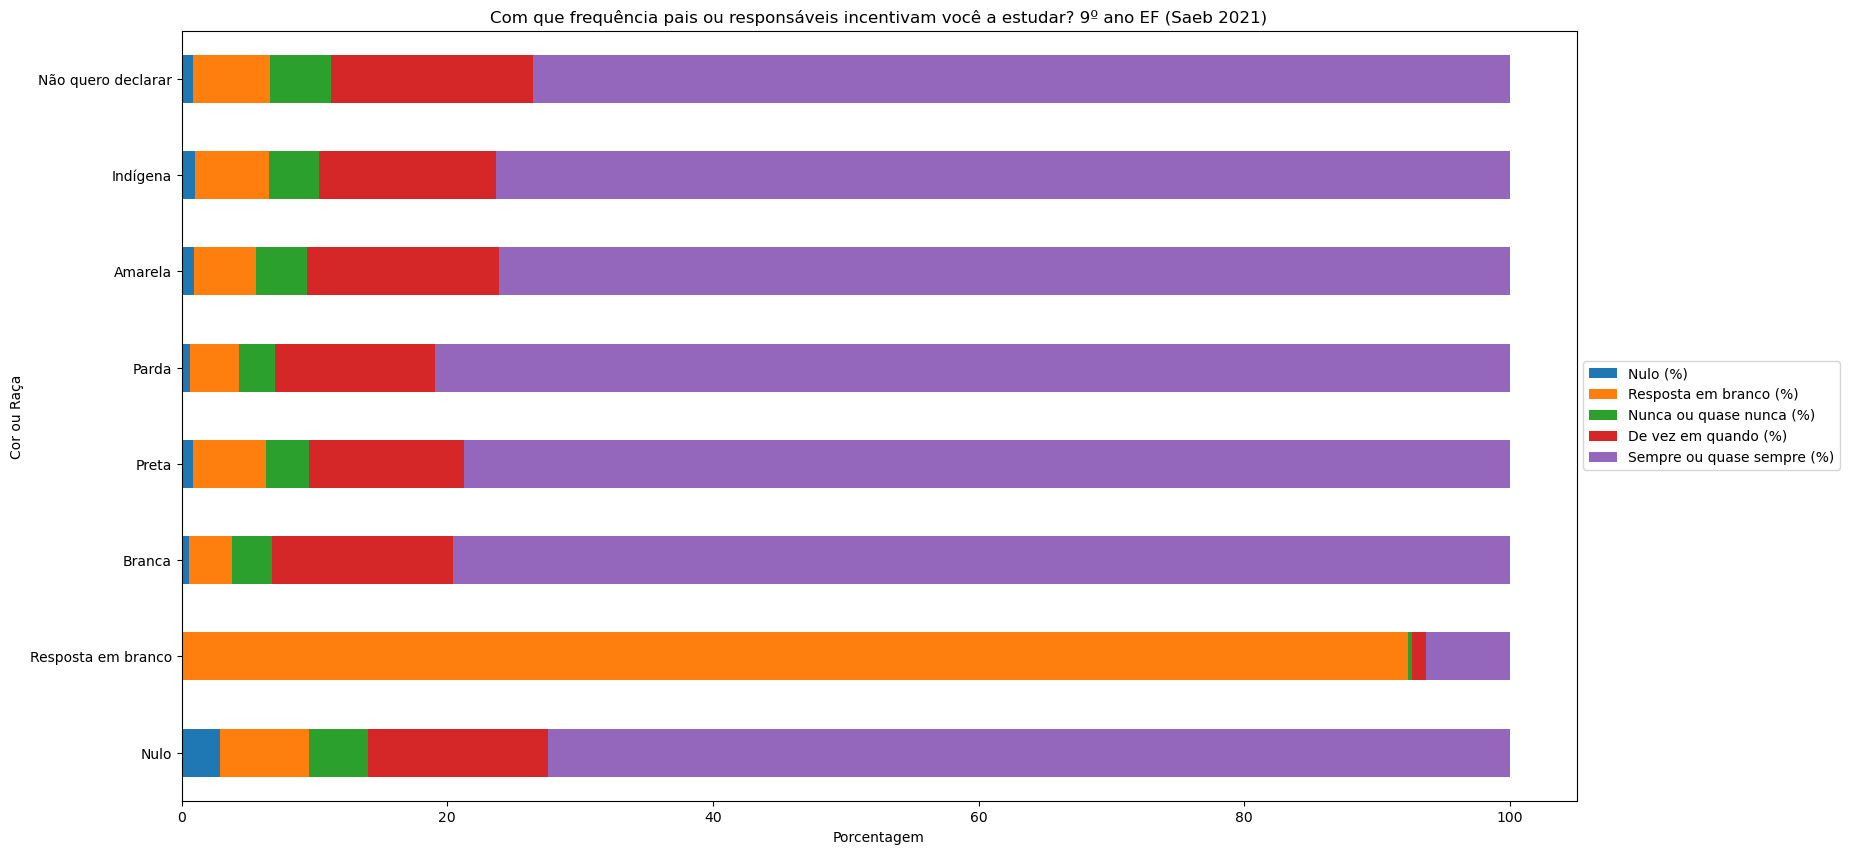

In [84]:
# Criar gráfico de barras empilhadas horizontais
ax = saeb2021_9EF_incentivo_estudo_porcentagem.plot(kind='barh', stacked=True, figsize=(18, 10))

# Configurar rótulos e título
ax.set_xlabel('Porcentagem')
ax.set_ylabel('Cor ou Raça')
ax.set_title('Com que frequência pais ou responsáveis incentivam você a estudar? 9º ano EF (Saeb 2021)')

# Adicionar a legenda fora do gráfico
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Salvar imagem:
plt.savefig('9EF_Incentivo a estudar.png', bbox_inches='tight')


# Exibir o gráfico
plt.show()

In [85]:
saeb2021_9EF_incentivo_estudo_porcentagem

,Nulo (%),Resposta em branco (%),Nunca ou quase nunca (%),De vez em quando (%),Sempre ou quase sempre (%)
Cor ou Raça,,,,,
Nulo,2.87,6.76,4.40,13.57,72.41
Resposta em branco,0.09,92.22,0.29,1.09,6.31
Branca,0.57,3.21,3.05,13.57,79.61
Preta,0.87,5.47,3.22,11.70,78.74
Parda,0.67,3.63,2.70,12.09,80.91
Amarela,0.96,4.65,3.83,14.45,76.11
Indígena,1.05,5.54,3.75,13.31,76.34
Não quero declarar,0.84,5.84,4.59,15.16,73.56
